# The Best Neighborhood in Pittsburgh

## Introduction

We went through a few ideas before we settled on our topic. We always had recreational activities in mind, but we wanted to make this project interesting. We went from best neighborhoods for recreational activities, to best places to party, to best places for parkour, to best places to meet an alien. We asked ourselves what we would look for in a neighborhood when visiting a new city. We used a few metrics to determine the best neighborhood from publicly available datasets. 

## The Metric
### The Best Neighborhood to Befriend an Alien
We decided to search for things that are culturally significant to humans but also easy to understand for aliens. We aim to visit the neighborhood with the most of each feature to provide a fun and meaningful visit for the alien.
We wanted to focus on playgrounds and green spaces, but it turned out that focusing on courts/rinks was easier than analyzing land area and location. We thought adding public art into the mix would be useful since we want to communicate to this alien the values of humanity through artistic expression. This expression can not only communicate human emotion, but also human events.

The following datasets were used:
- [**City Courts and Rinks**](https://data.wprdc.org/dataset/city-of-pittsburgh-courts)
- [**City of Pittsburgh Playgrounds**](https://data.wprdc.org/dataset/playgrounds)
- [**City of Pittsburgh Public Art**](https://data.wprdc.org/dataset/city-of-pittsburgh-public-art)

---

## The Best Neighborhood

In [1]:
import pandas as pd
import numpy as np
#import geopandas unused in playground notebook
%matplotlib inline
import matplotlib.pyplot as plt

The above code cell loads in the libraries needed for this Notebook.

### Courts and Rinks

In [2]:
# load the Courts and Rinks data set
Courts_Rinks = pd.read_csv("https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227")

Here is the first question: 
#### What kind of sport would be the easiest to play with an alien?

In [3]:
print(Courts_Rinks["type"].unique())

['Basketball (Full)' 'Tennis' 'Basketball (Half)' 'General Sports'
 'Hockey' 'Dek Hockey' 'Pickleball' 'Lawn Bowling' 'Bocce' 'Volleyball'
 'Horseshoe Pit']


From these available rinks/courts we need to come up with a rational for which sport we want to play.

#### Now we need to decide what earthly sport would be best suited to help befriend an alien...

Basketball is pretty easy to explain. Ball goes in hoop. There are a few fouls that would need to be covered but in general this sport is one of the easiest to explain to our alien friends. There is also many different ways we could play instead of a normal game, like trying to play HORSE or just making free throws to enjoy a less intense version of the sport. Basketball is also really popular in many countries and would have good cultural significance. 

***


First, since we determined the best sport to play with an alien is basketball, lets **filter out** the sports that didn't make the cut! This way we can focus on only the basketball courts in Pittsburgh.

In [4]:
query_mask = Courts_Rinks['type'].str.contains("Basketball")

basketball = Courts_Rinks[query_mask]

basketball.head(5)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
5,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
6,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
7,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371


Now that we filtered our data set down to only basketball courts, we can count the number of basketball courts in each neighborhood.

Below is a table of the top 10 neighborhoods that have the most basketball courts.

In [25]:
tally = basketball['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')

tally.head(10)

,neighborhood,counts
0,Beechview,6
1,South Side Slopes,5
2,Hazelwood,5
3,Terrace Village,4
4,Squirrel Hill South,4
5,Elliott,4
6,Beltzhoover,4
7,Sheraden,4
8,Troy Hill,3
9,Brookline,3


Here is a graph of the distribtutions of neighborhoods and how many courts they have. We can see that many neighborhoods have 1 court but only one neighborhood has 6 courts.

<AxesSubplot:xlabel='Number of Courts', ylabel='Number of Neighborhoods'>

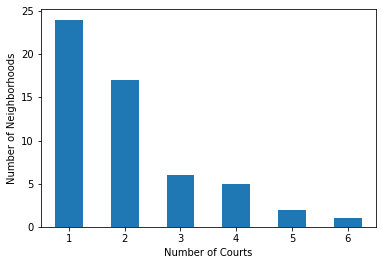

In [27]:
tally["counts"].value_counts().sort_index().plot(kind='bar', rot=0, xlabel = "Number of Courts", ylabel = "Number of Neighborhoods")

As shown in the table and the graph, we can see that according to the number of basketball courts in Pittsburgh, Beechview is the best neighborhood for befriending an alien!

---

### Playgrounds

Just like sports courts and rinks, playgrounds provide an area to have fun and unwind. They're also pretty safe, being built with children in mind, making them an excellent, non-dangerous choice for our alien buddy.

To ensure there's plenty of variety, the neighborhood with the most playgrounds will be evaluated.

In [7]:
# load Playgrounds data from WPRDC
playground_data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367",
                           index_col="id") # using id as row index

The data for Playgrounds in Pittsburgh is downloaded directly from the WPRDC.

In [8]:
# makes new dataframe of how many playgrounds are in each neigborhood
tally = playground_data['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')

tally.head(10)

,neighborhood,counts
0,Squirrel Hill South,8
1,Beechview,5
2,South Side Slopes,5
3,Allegheny Center,4
4,Beltzhoover,4
5,Highland Park,4
6,Sheraden,4
7,Carrick,3
8,Crawford-Roberts,3
9,Mount Washington,3


Next, a new dataset is created from the original data of Playgrounds in Pittsburgh. This new dataset, "tally," counts the amount of playgrounds within each neighborhood.

In the table above, the top 10 neighborhoods with the most playgrounds are shown. Squirrel Hill South seems to be the definitive winner, with 8 playgrounds in total.

<AxesSubplot:ylabel='counts'>

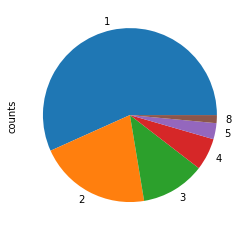

In [9]:
tally["counts"].value_counts().sort_index().plot.pie(y='counts', 
                                                  subplots=False, 
                                                  figsize=(8, 4))

To provide a visual of the data, this pie chart shows how many neighborhoods have a certain number of playgrounds. The majority of neighborhoods contain only 1 playground, with more playgrounds being sequentially rarer.

Taking only playground total into account, Squirrel Hill South appears to be the best neighborhood for befriending an alien.

### Public Art

---

After some time on the b-ball court and the monkey bars, your alien friend might be a little tired and wishes to relax

Let's investigate what the art scene is like around Pittsburgh!

In [10]:
art_data = pd.read_csv("https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151")
art_data.head(5)

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981


In [11]:
neighborhood_art_count = art_data.groupby(by=['neighborhood'])['title'].count().reset_index(name='count').sort_values(by='count', ascending=False)
neighborhood_art_count.head(10)

,neighborhood,count
9,Central Business District,27
47,Squirrel Hill South,22
0,Allegheny Center,18
42,South Side Flats,10
25,Highland Park,10
32,North Shore,8
3,Beechview,8
40,Shadyside,6
6,Brighton Heights,5
11,Central Oakland,5


This gives us the raw number of pieces of public art by neighborhood from most to least. It appears that the `Central Business District` and `Squirrel Hill South` dominate the list. 

<AxesSubplot:xlabel='neighborhood'>

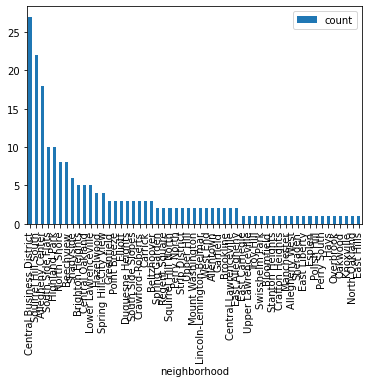

In [12]:
neighborhood_art_count.plot.bar(x='neighborhood', y='count')

This looks a little cramped. Let's try to filter out the neighborhoods with low numbers.

<AxesSubplot:xlabel='neighborhood'>

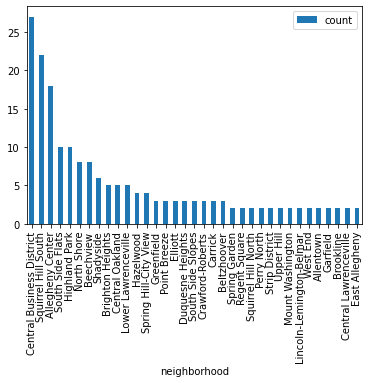

In [13]:
all_count_mask = neighborhood_art_count['count'] > 1
neighborhood_art_count[all_count_mask].plot.bar(x='neighborhood', y='count')

This still looks a little messy. Let's remove some more!

<AxesSubplot:xlabel='neighborhood'>

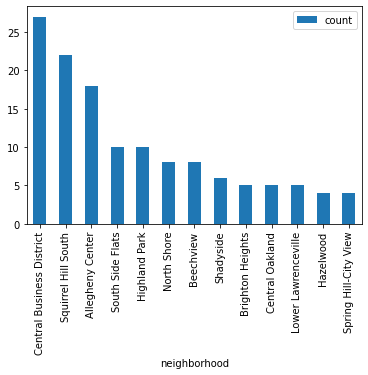

In [14]:
all_count_mask_2 = neighborhood_art_count['count'] > 3
neighborhood_art_count[all_count_mask_2].plot.bar(x='neighborhood', y='count')

That's better!

There are many different types of art that serve a particular purpose, so it can be difficult to choose what type of art an alien would enjoy. Let's look at what types are available.

In [15]:
neighborhood_art_types = art_data.groupby(by=['art_type'])['art_type'].count().reset_index(name='count').sort_values(by='count', ascending=False)
neighborhood_art_types

,art_type,count
2,Modern and Contemporary Art,68
4,War Memorials,57
1,Individual and Historic Monuments,40
0,Historic Art,23
3,Non-City Owned,12


While this gives us raw counts, let's compare the counts in a more visually pleasing way.

<AxesSubplot:xlabel='art_type'>

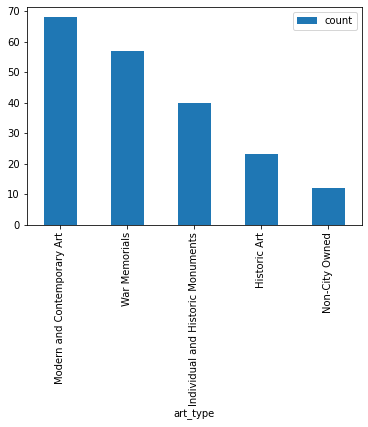

In [16]:
neighborhood_art_types.plot.bar(x='art_type',y='count')

It looks like historic artworks dominate the list. We have a few types to choose from, but what would be best for an alien? Modern and contemporary art may be confusing since it exists in a a social and emotional context that is alien (hehe) to them.

Since aliens are unfamiliar with Pittsburgh's history let alone America's history or the world's, I thought it would be nice to find some historically significant art. Since war is a significant human event, I include those in my filter.

In [17]:
historic_art_type_mask = art_data['art_type'].str.contains('Historic|War', na=False)
neighborhood_historic_art = art_data[historic_art_type_mask].groupby(by=['neighborhood'])['title'].count().reset_index(name='count').sort_values(by=['count', 'neighborhood'], ascending=False)
neighborhood_historic_art.head(10)

,neighborhood,count
31,Squirrel Hill South,19
7,Central Business District,19
0,Allegheny Center,16
16,Highland Park,7
17,Lower Lawrenceville,5
9,Central Oakland,5
27,South Side Flats,4
4,Brighton Heights,4
1,Beechview,4
30,Spring Hill-City View,3


Looks like we have our winners! To the bar chart!

<AxesSubplot:xlabel='neighborhood'>

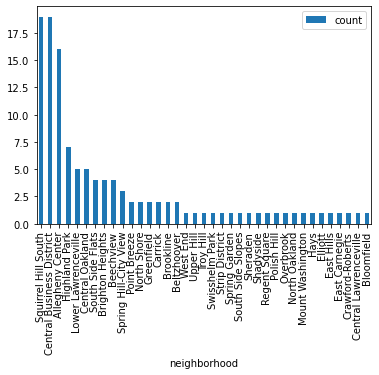

In [18]:
neighborhood_historic_art.plot.bar(x='neighborhood',y='count')

This looks a little crowded. Let's get rid of the neighborhoods with the lowest counts.

<AxesSubplot:xlabel='neighborhood'>

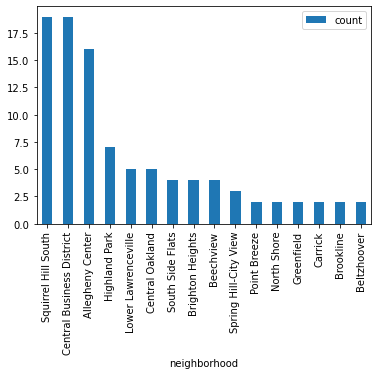

In [19]:
count_mask = neighborhood_historic_art['count'] > 1
neighborhood_historic_art[count_mask].plot.bar(x='neighborhood',y='count')

That's better! ENHANCE!

<AxesSubplot:xlabel='neighborhood'>

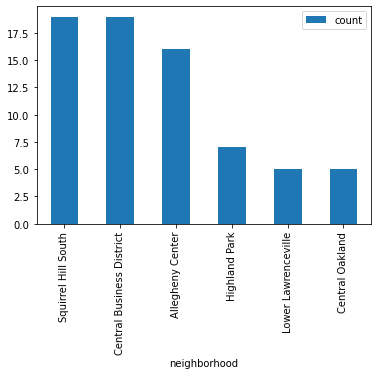

In [20]:
count_mask_2 = neighborhood_historic_art['count'] > 4
neighborhood_historic_art[count_mask_2].plot.bar(x='neighborhood',y='count')

Now that we've settled which neighborhood has more pieces of historic art, let's look at modern art!

In [21]:
modern_art_type_mask = art_data['art_type'].str.contains('Modern', na=False)
neighborhood_modern_art = art_data[modern_art_type_mask].groupby(by=['neighborhood'])['title'].count().reset_index(name='count').sort_values(by=['count', 'neighborhood'], ascending=False)
neighborhood_modern_art.head(10)

,neighborhood,count
7,Central Business District,7
20,North Shore,6
25,Shadyside,5
26,South Side Flats,4
16,Hazelwood,4
29,Squirrel Hill South,3
17,Highland Park,3
21,Perry North,2
18,Lincoln-Lemington-Belmar,2
13,Elliott,2


It looks like there are far fewer modern pieces of art scattered across the city than historic pieces. Let's get a better view.

<AxesSubplot:xlabel='neighborhood'>

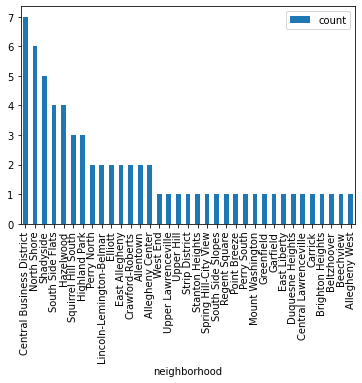

In [22]:
neighborhood_modern_art.plot.bar(x='neighborhood',y='count')

Why must there be so many neighborhoods! Anyway, let's do what we did last time by removing neighborhoods with only 1 row.

<AxesSubplot:xlabel='neighborhood'>

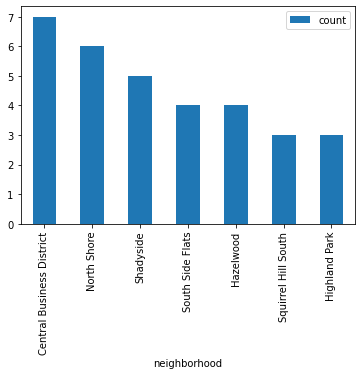

In [23]:
modern_art_count_mask = neighborhood_modern_art['count'] > 2
neighborhood_modern_art[modern_art_count_mask].plot.bar(x='neighborhood',y='count')

It looks like the `Central Business District` takes a commanding lead over `Squirrel Hill South` in the modern art department. Sure you could take an alien there to see some more modern art, but Downtown would be too overwhelming. You want to start off in a quieter place when you first meet. How are they supposed to land their spaceship Downtown? Parking there is a hot commodity. The `Central Business District` has the most are overall and the most modern art, but `Squirrel Hill South` ties for historic art.

## Conclusion

We ultimately decided **Squirrel Hill South** was the best neighborhood.

It ranked 1st in the Playgrounds metric, ranked 1st (tied) in public historic art and 2nd for all art, and ranked 4th in Courts and Rinks. No other neighborhood was consistently high-ranking in all of our metrics.